In [1]:
# Install Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sketch
import os

os.environ['SKETCH_MAX_COLUMNS'] = '25'

# Data Cleaning & Transformation Process

In [2]:
# Import Dataset

df = pd.read_csv("C:/Users/surya/OneDrive/Documents/Kuliah S2/Semester 2 (Oct 2023)/ABW508 (Analytics Lab)/Dataset/Lifestyle & Wellbeing Data/Wellbeing_and_lifestyle_data_Kaggle.csv")
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

#### There are 15,972 rows with 24 column. The record also shows no missing values. 

#### For data type, DAILY_STRESS dtype is incorrect, it should be int64, not object. Therefore we change it

In [4]:
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('int64')

ValueError: invalid literal for int() with base 10: '1/1/00'

There is an error in one of the values in DAILY_STRESS column, let's check the unique value in this column

In [5]:
df['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

Got it, the values of '1/1/00' should not be there. Since it only one, we could delete it.

In [6]:
df = df[df['DAILY_STRESS'] != '1/1/00']

#### Check the unique value of DAILY_STRESS column again

In [7]:
df['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0'], dtype=object)

#### Okay, the row is deleted. Now we can convert the data type into int64

In [8]:
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int64  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-null  int64  
 14  SLEEP_HOURS              15

#### Done. 

#### Next is changing the WORK_LIFE_BALANCE_SCORE from float to int, since it only contain one decimal and will make the interpretation easier.

In [10]:
df['WORK_LIFE_BALANCE_SCORE'] = df['WORK_LIFE_BALANCE_SCORE'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                15971 non-null  object
 1   FRUITS_VEGGIES           15971 non-null  int64 
 2   DAILY_STRESS             15971 non-null  int64 
 3   PLACES_VISITED           15971 non-null  int64 
 4   CORE_CIRCLE              15971 non-null  int64 
 5   SUPPORTING_OTHERS        15971 non-null  int64 
 6   SOCIAL_NETWORK           15971 non-null  int64 
 7   ACHIEVEMENT              15971 non-null  int64 
 8   DONATION                 15971 non-null  int64 
 9   BMI_RANGE                15971 non-null  int64 
 10  TODO_COMPLETED           15971 non-null  int64 
 11  FLOW                     15971 non-null  int64 
 12  DAILY_STEPS              15971 non-null  int64 
 13  LIVE_VISION              15971 non-null  int64 
 14  SLEEP_HOURS              15971 non-null  in

In [12]:
df['WORK_LIFE_BALANCE_SCORE'].unique()

array([609, 655, 631, 622, 663, 722, 727, 676, 702, 634, 610, 618, 686,
       689, 639, 720, 673, 707, 687, 652, 668, 709, 752, 677, 633, 628,
       692, 712, 574, 630, 746, 591, 729, 593, 682, 723, 635, 657, 732,
       685, 742, 710, 658, 640, 557, 669, 571, 575, 678, 648, 649, 656,
       680, 661, 739, 528, 694, 662, 704, 538, 654, 651, 724, 696, 749,
       594, 758, 551, 718, 697, 670, 666, 638, 626, 605, 645, 690, 627,
       643, 637, 665, 714, 717, 748, 653, 588, 672, 695, 708, 595, 671,
       625, 705, 753, 713, 576, 602, 612, 679, 730, 619, 683, 632, 733,
       711, 558, 636, 604, 620, 674, 715, 596, 698, 706, 642, 699, 583,
       597, 615, 741, 644, 608, 734, 650, 743, 725, 703, 660, 688, 754,
       624, 573, 581, 667, 598, 728, 629, 693, 607, 664, 646, 681, 589,
       684, 769, 601, 771, 600, 700, 641, 579, 553, 556, 554, 721, 559,
       691, 764, 701, 659, 621, 731, 585, 675, 611, 584, 550, 603, 747,
       738, 614, 780, 781, 799, 719, 647, 740, 751, 563, 760, 75

#### Done. 

#### Let's recode the DAILY_SHOUTING and LOST_VACATION to make the connotation are align with the other variables. Since in these two variables, the higher number it gets, the more negative the connotation.

In [13]:
df.sketch.ask("How to recode the values in DAILY_SHOUTING column? like 0 to 10, 1 to 9, etc?")

In [14]:
df.sketch.ask("How to change the values in DAILY_SHOUTING column? like 0 to 10, 1 to 9, etc?")

In [15]:
df['DAILY_SHOUTING'].unique()

array([ 5,  2,  0,  3,  1,  7,  6,  4, 10,  8,  9], dtype=int64)

In [16]:
# Define the mapping for recoding
recode_map = {
    0: 10,
    1: 9,
    2: 8,
    3: 7,
    4: 6,
    5: 5,
    6: 4,
    7: 3,
    8: 2,
    9: 1,
    10: 0}

In [17]:
# Recode values in DAILY_SHOUTING
df['DAILY_SHOUTING'] = df['DAILY_SHOUTING'].replace(recode_map)

In [18]:
# Recode values in LOST_VACATION

df['LOST_VACATION']= df['LOST_VACATION'].replace(recode_map)

#### Drop the Timestamp column, since we would not do time series analysis

In [19]:
df = df.drop('Timestamp', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15971 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FRUITS_VEGGIES           15971 non-null  int64 
 1   DAILY_STRESS             15971 non-null  int64 
 2   PLACES_VISITED           15971 non-null  int64 
 3   CORE_CIRCLE              15971 non-null  int64 
 4   SUPPORTING_OTHERS        15971 non-null  int64 
 5   SOCIAL_NETWORK           15971 non-null  int64 
 6   ACHIEVEMENT              15971 non-null  int64 
 7   DONATION                 15971 non-null  int64 
 8   BMI_RANGE                15971 non-null  int64 
 9   TODO_COMPLETED           15971 non-null  int64 
 10  FLOW                     15971 non-null  int64 
 11  DAILY_STEPS              15971 non-null  int64 
 12  LIVE_VISION              15971 non-null  int64 
 13  SLEEP_HOURS              15971 non-null  int64 
 14  LOST_VACATION            15971 non-null  in

### After cleaning process, we have 15,971 rows with 23 column

#### Save the dataset

In [21]:
df.to_csv('abw508_clean_dataset.csv', index=False)

# Descriptive Analysis

In [22]:
# Import Clean Dataset

df_clean = pd.read_csv("C:/Users/surya/OneDrive/Documents/Kuliah S2/Semester 2 (Oct 2023)/ABW508 (Analytics Lab)/Dataset/Lifestyle & Wellbeing Data/abw508_clean_dataset.csv")
df_clean.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609
1,2,3,4,3,8,10,5,2,2,5,...,8,8,8,2,3,2,6,36 to 50,Female,655
2,2,3,3,4,4,10,3,2,2,2,...,8,0,8,2,4,8,3,36 to 50,Female,631
3,3,3,10,3,10,7,2,5,2,3,...,5,3,5,1,5,2,0,51 or more,Female,622
4,5,1,3,3,10,4,2,4,2,5,...,7,10,10,2,8,1,5,51 or more,Female,663


### Descriptive Statistics & The Distribution Plot

In [23]:
# State the dimension

expertise_dimension = ['ACHIEVEMENT', 'SUFFICIENT_INCOME','PERSONAL_AWARDS', 'TODO_COMPLETED']
life_meaning_dimension = ['DONATION', 'LIVE_VISION', 'TIME_FOR_PASSION', 'LOST_VACATION']
mental_awareness_dimension = ['DAILY_STRESS', 'FLOW','DAILY_SHOUTING','WEEKLY_MEDITATION']
physical_awareness_dimension = ['FRUITS_VEGGIES', 'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS']
social_connection_dimension = ['PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK'] 

In [24]:
def plot_individual_barcharts(data, columns, dimension_title):
    num_variables = len(columns)
    fig, axs = plt.subplots(1, num_variables, figsize=(20 * num_variables, 20))

    for i, column in enumerate(columns):
        value_counts = data[column].value_counts().sort_index()
        axs[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
        axs[i].set_title(f'{column}', fontsize=20)
        axs[i].set_xlabel('Values')
        axs[i].set_ylabel('Frequency')
        axs[i].set_xticks(value_counts.index)
        axs[i].grid(axis='y')

    #plt.suptitle(f'{dimension_title}', fontsize=18, y=1.05)
    plt.tight_layout()
    plt.show()

In [25]:
def plot_individual_barcharts_2x2(df_clean, columns, dimension_title):
    # Ensure there are exactly four variables for this 2x2 layout
    if len(columns) != 4:
        raise ValueError("This function is designed for exactly four variables.")

    # Creating a 2x2 grid for subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Adjusted for a 2x2 grid

    for i, column in enumerate(columns):
        # Determine the position of the subplot
        row = i // 2
        col = i % 2

        # Count the frequency of each value in the column
        value_counts = df_clean[column].value_counts().sort_index()

        # Plotting bar chart in the appropriate subplot
        axs[row, col].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
        axs[row, col].set_title(f'{column}', fontsize=15)
        axs[row, col].set_xlabel('Values')
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].set_xticks(value_counts.index)
        axs[row, col].grid(axis='y')

    #plt.suptitle(f'{dimension_title}', fontsize=18, y=1.05)
    plt.tight_layout()
    plt.show()

#### Expertise Dimension ['ACHIEVEMENT', 'SUFFICIENT_INCOME','PERSONAL_AWARDS', 'TODO_COMPLETED']

In [26]:
# Subset DataFrame with selected columns
df_ed = df_clean[expertise_dimension]

# Calculate mean, median, and mode
statistics_df_ed = pd.DataFrame({
    'Count': df_ed.count(),
    'Min': df_ed.min(),
    'Max': df_ed.max(),
    'Range': df_ed.max() - df_ed.min(),
    'Mean': df_ed.mean(),
    'Median': df_ed.median(),
    'Mode': df_ed.mode().iloc[0], # Use iloc[0] to get the first mode in case of multiple modes
    'Variance' : df_ed.var(),
    "Standard Deviation" : df_ed.std()
})

# Display the statistics table
print(statistics_df_ed)

                   Count  Min  Max  Range      Mean  Median  Mode  Variance  \
ACHIEVEMENT        15971    0   10     10  4.000689     3.0     2  7.595053   
SUFFICIENT_INCOME  15971    1    2      1  1.728946     2.0     2  0.197596   
PERSONAL_AWARDS    15971    0   10     10  5.711289     5.0    10  9.545257   
TODO_COMPLETED     15971    0   10     10  5.745977     6.0     8  6.886314   

                   Standard Deviation  
ACHIEVEMENT                  2.755912  
SUFFICIENT_INCOME            0.444518  
PERSONAL_AWARDS              3.089540  
TODO_COMPLETED               2.624179  


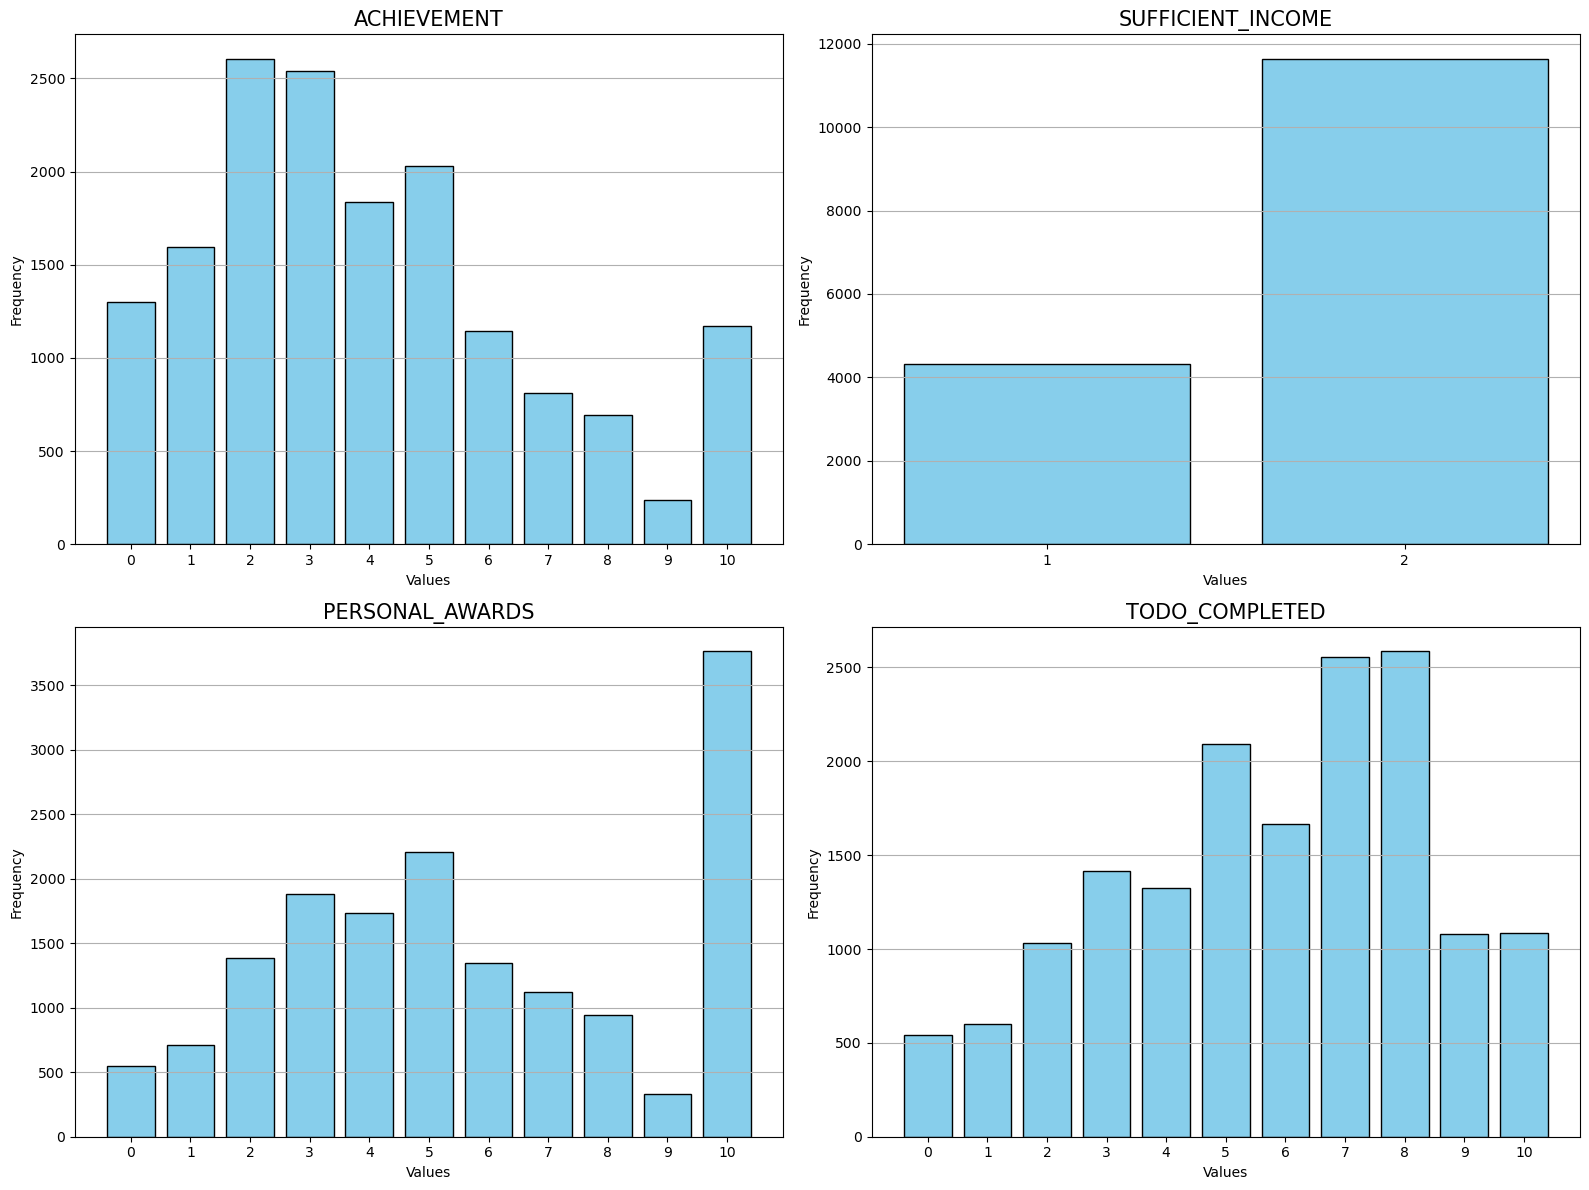

In [27]:
# Visualizing individual bar plots for 'expertise_dimension'

plot_individual_barcharts_2x2(df_clean, expertise_dimension, 'Expertise Dimension')

#### Life Meaning Dimension = ['DONATION', 'LIVE_VISION', 'TIME_FOR_PASSION', 'LOST_VACATION']

In [28]:
# Subset DataFrame with selected columns
df_lm = df_clean[life_meaning_dimension]

# Calculate mean, median, and mode
statistics_df_lm = pd.DataFrame({
    'Min': df_lm.min(),
    'Max': df_lm.max(),
    'Range': df_lm.max() - df_lm.min(),
    'Mean': df_lm.mean(),
    'Median': df_lm.median(),
    'Mode': df_lm.mode().iloc[0], # Use iloc[0] to get the first mode in case of multiple modes
    'Variance' : df_lm.var(),
    "Standard Deviation" : df_lm.std()
})

# Display the statistics table
print(statistics_df_lm)

                  Min  Max  Range      Mean  Median  Mode   Variance  \
DONATION            0    5      5  2.715171     3.0     5   3.428260   
LIVE_VISION         0   10     10  3.752176     3.0     5  10.439894   
TIME_FOR_PASSION    0   10     10  3.326279     3.0     1   7.448138   
LOST_VACATION       0   10     10  7.101559    10.0    10  13.629885   

                  Standard Deviation  
DONATION                    1.851556  
LIVE_VISION                 3.231083  
TIME_FOR_PASSION            2.729128  
LOST_VACATION               3.691867  


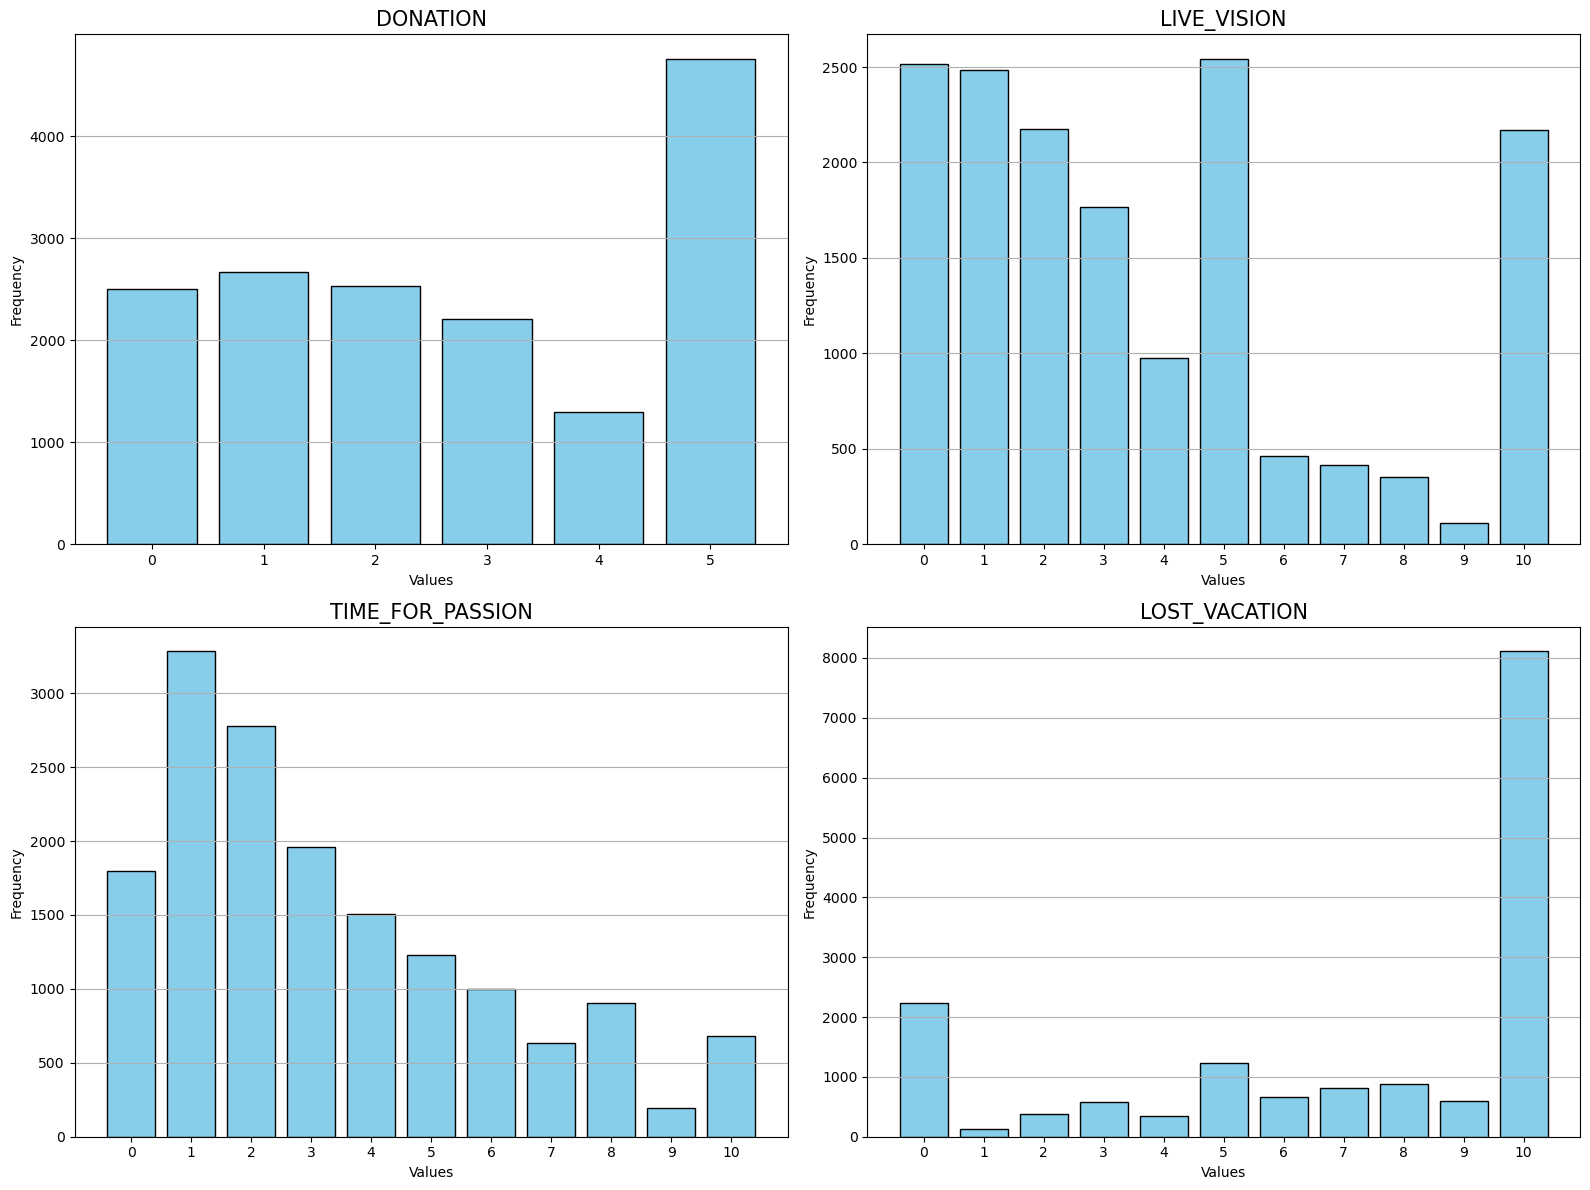

In [29]:
# Visualizing individual bar plots for 'Life Meaning DImension'

plot_individual_barcharts_2x2(df_clean, life_meaning_dimension, 'Life Meaning Dimension')

#### Mental Awareness Dimension = ['DAILY_STRESS', 'FLOW','DAILY_SHOUTING','WEEKLY_MEDITATION']

In [30]:
# Subset DataFrame with selected columns
df_ma = df_clean[mental_awareness_dimension]

# Calculate mean, median, and mode
statistics_df_ma = pd.DataFrame({
    'Min': df_ma.min(),
    'Max': df_ma.max(),
    'Range': df_ma.max() - df_ma.min(),
    'Mean': df_ma.mean(),
    'Median': df_ma.median(),
    'Mode': df_ma.mode().iloc[0], # Use iloc[0] to get the first mode in case of multiple modes
    'Variance' : df_ma.var(),
    "Standard Deviation" : df_ma.std()
})

# Display the statistics table
print(statistics_df_ma)

                   Min  Max  Range      Mean  Median  Mode  Variance  \
DAILY_STRESS         0    5      5  2.791685     3.0     3  1.870879   
FLOW                 0   10     10  3.194477     3.0     2  5.556791   
DAILY_SHOUTING       0   10     10  7.069000     8.0     9  7.162803   
WEEKLY_MEDITATION    0   10     10  6.233611     7.0    10  9.099148   

                   Standard Deviation  
DAILY_STRESS                 1.367801  
FLOW                         2.357285  
DAILY_SHOUTING               2.676341  
WEEKLY_MEDITATION            3.016479  


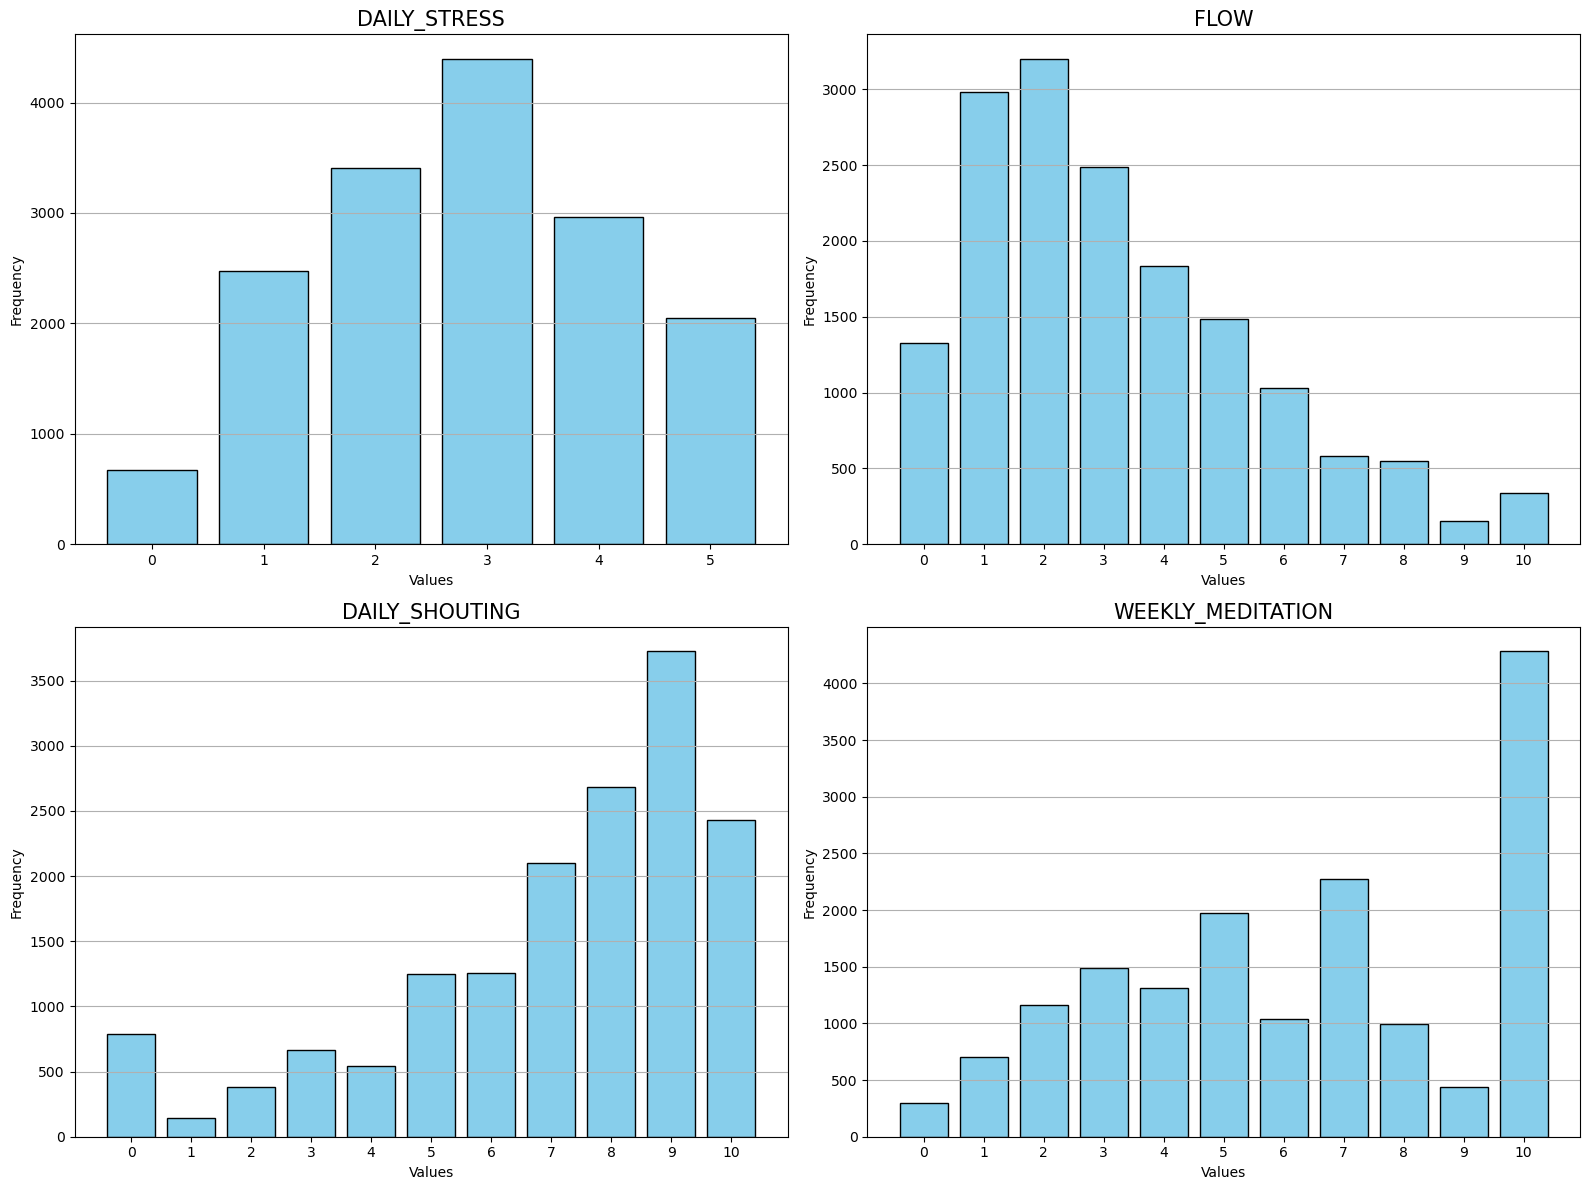

In [31]:
# Visualizing individual bar plots for 'Mental Health Awareness Dimension'

plot_individual_barcharts_2x2(df_clean, mental_awareness_dimension, 'Mental Health Awareness Dimension')

#### Physical Awareness Dimension = ['FRUITS_VEGGIES', 'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS']

In [32]:
# Subset DataFrame with selected columns
df_pa = df_clean[physical_awareness_dimension]

# Calculate mean, median, and mode
statistics_df_pa = pd.DataFrame({
    'Min': df_pa.min(),
    'Max': df_pa.max(),
    'Range': df_pa.max() - df_pa.min(),
    'Mean': df_pa.mean(),
    'Median': df_pa.median(),
    'Mode': df_pa.mode().iloc[0], # Use iloc[0] to get the first mode in case of multiple modes
    'Variance' : df_pa.var(),
    "Standard Deviation" : df_pa.std()
})

# Display the statistics table
print(statistics_df_pa)

                Min  Max  Range      Mean  Median  Mode  Variance  \
FRUITS_VEGGIES    0    5      5  2.922672     3.0     3  2.081497   
BMI_RANGE         1    2      1  1.410619     1.0     1  0.242026   
DAILY_STEPS       1   10      9  5.703588     5.0    10  8.358471   
SLEEP_HOURS       1   10      9  7.042953     7.0     7  1.437729   

                Standard Deviation  
FRUITS_VEGGIES            1.442739  
BMI_RANGE                 0.491962  
DAILY_STEPS               2.891102  
SLEEP_HOURS               1.199053  


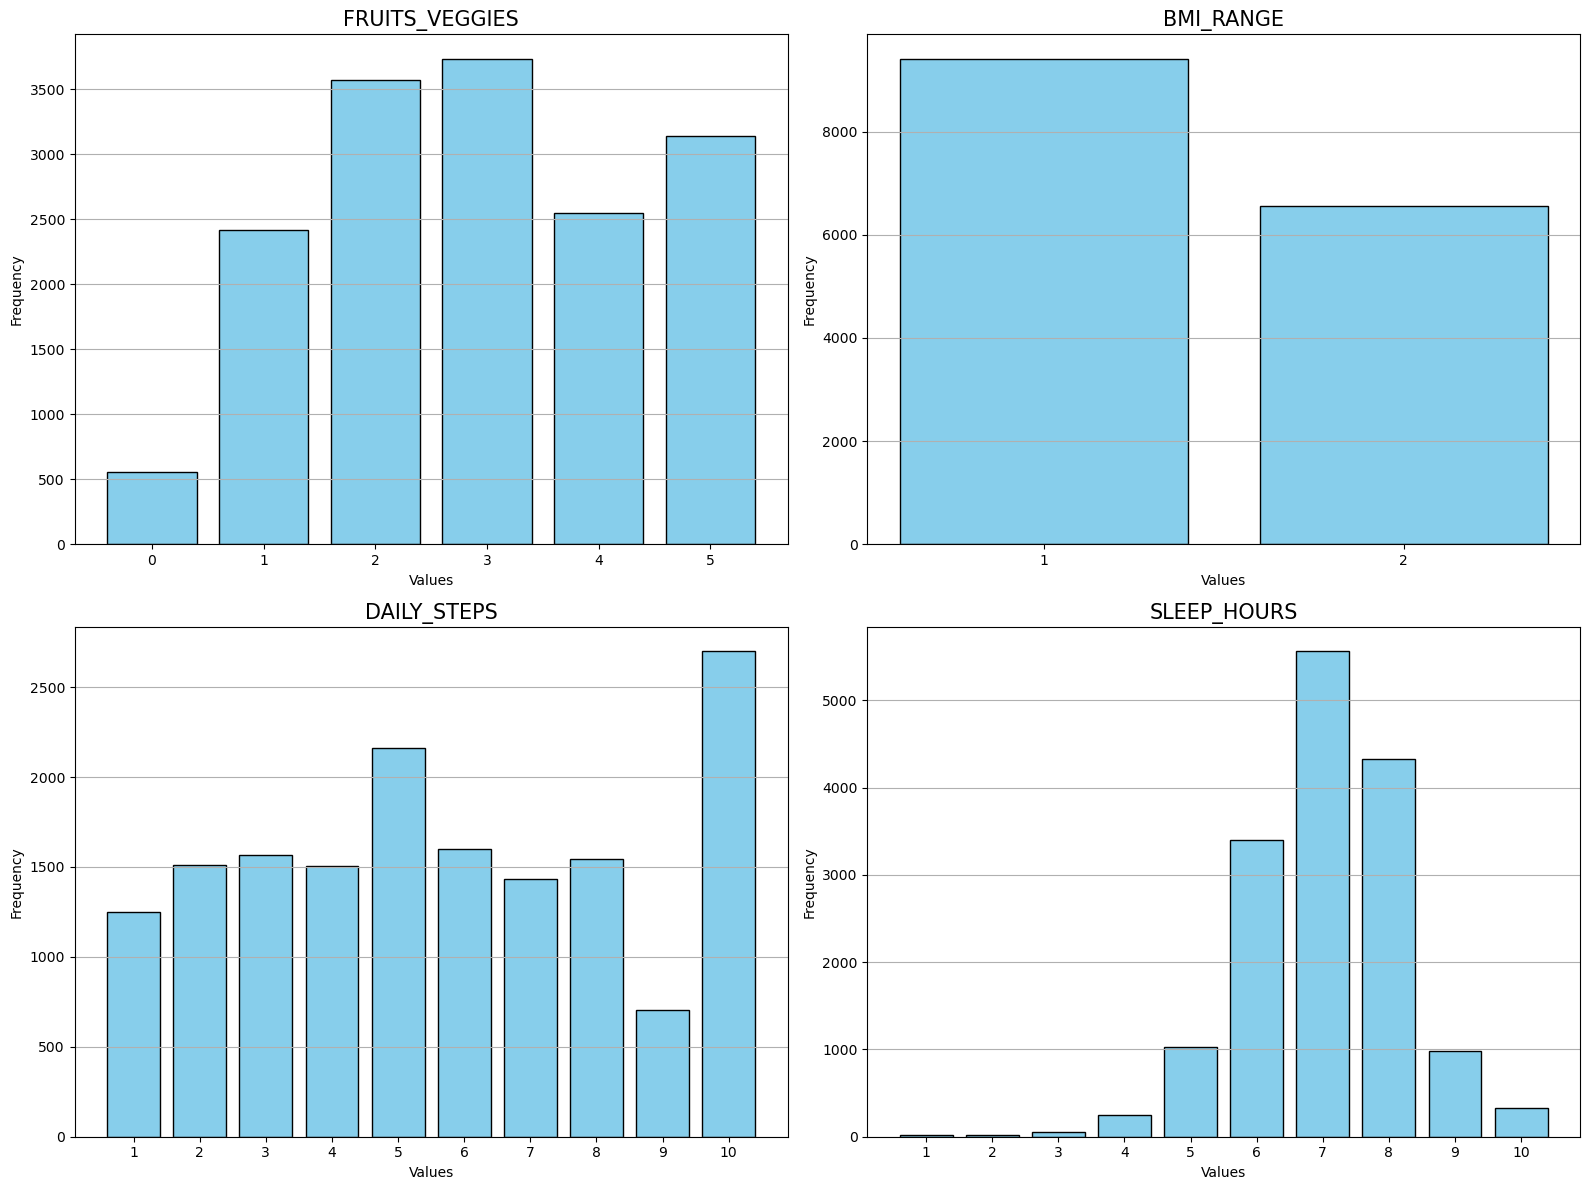

In [33]:
# Visualizing individual bar plots for 'Physical Health Awareness Dimension'

plot_individual_barcharts_2x2(df_clean, physical_awareness_dimension, 'Physical Health Awareness Dimension')

In [83]:
#### Social Connection Dimension = ['PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK'] 

In [34]:
# Subset DataFrame with selected columns
df_sc = df_clean[social_connection_dimension]

# Calculate mean, median, and mode
statistics_df_sc = pd.DataFrame({
    'Min': df_sc.min(),
    'Max': df_sc.max(),
    'Range': df_sc.max() - df_sc.min(),
    'Mean': df_sc.mean(),
    'Median': df_sc.median(),
    'Mode': df_sc.mode().iloc[0], # Use iloc[0] to get the first mode in case of multiple modes
    'Variance' : df_sc.var(),
    "Standard Deviation" : df_sc.std()
})

# Display the statistics table
print(statistics_df_sc)

                   Min  Max  Range      Mean  Median  Mode   Variance  \
PLACES_VISITED       0   10     10  5.233235     5.0    10  10.968328   
CORE_CIRCLE          0   10     10  5.508296     5.0    10   8.067229   
SUPPORTING_OTHERS    0   10     10  5.616179     5.0    10  10.510155   
SOCIAL_NETWORK       0   10     10  6.474047     6.0    10   9.527363   

                   Standard Deviation  
PLACES_VISITED               3.311847  
CORE_CIRCLE                  2.840287  
SUPPORTING_OTHERS            3.241937  
SOCIAL_NETWORK               3.086643  


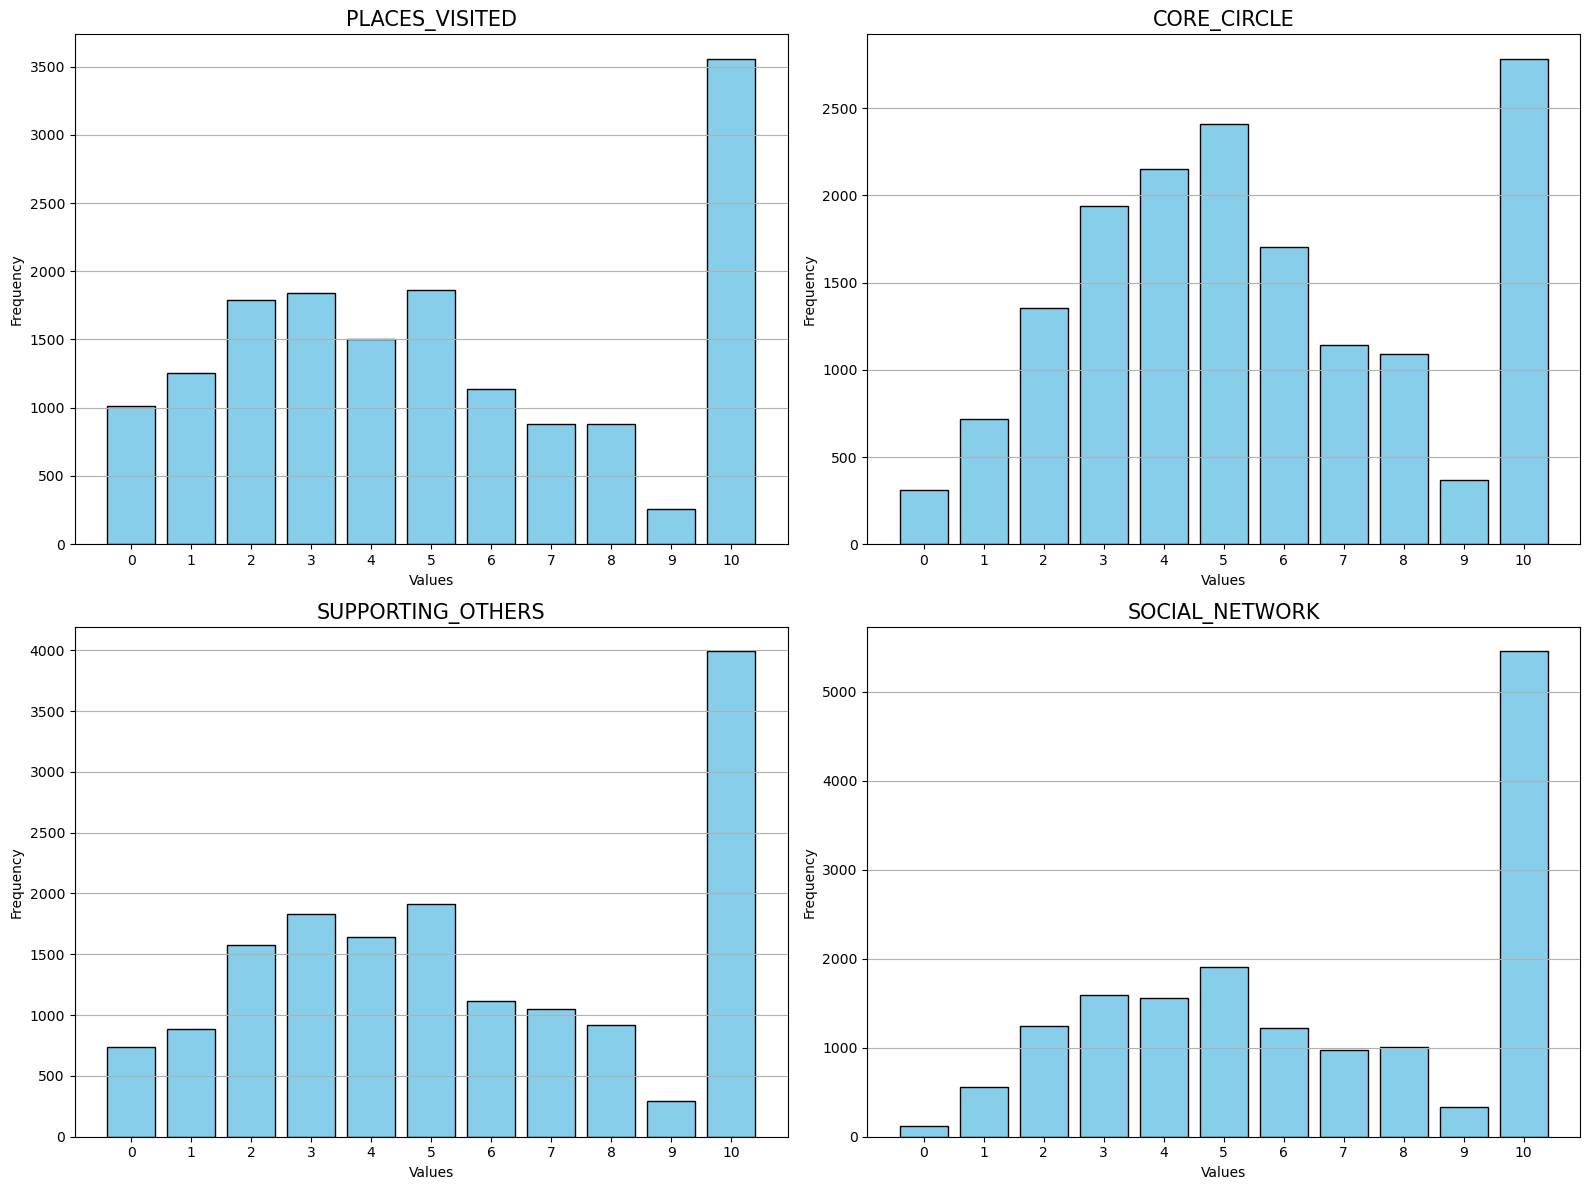

In [35]:
# Visualizing individual bar plots for 'Social Connection Dimension'

plot_individual_barcharts_2x2(df_clean, social_connection_dimension, 'Social Connection Dimension')

In [36]:
mean = df_clean['WORK_LIFE_BALANCE_SCORE'].mean()
median = df_clean['WORK_LIFE_BALANCE_SCORE'].median()
mode = df_clean['WORK_LIFE_BALANCE_SCORE'].mode()[0]  # Taking the first mode
min_value = df_clean['WORK_LIFE_BALANCE_SCORE'].min()
max_value = df_clean['WORK_LIFE_BALANCE_SCORE'].max()
range_value = max_value - min_value
std_dev = df_clean['WORK_LIFE_BALANCE_SCORE'].std()
variance = df_clean['WORK_LIFE_BALANCE_SCORE'].var()

# Creating a DataFrame to display these statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Range', 'Standard Deviation', 'Variance'],
    'Value': [mean, median, mode, min_value, max_value, range_value, std_dev, variance]
})

# Rounding the values to two decimal places
stats_df_rounded = stats_df.copy()
stats_df_rounded['Value'] = stats_df['Value'].round(2)

stats_df_rounded

,Statistic,Value
0,Mean,666.30
1,Median,667.00
2,Mode,641.00
3,Min,480.00
4,Max,820.00
5,Range,340.00
6,Standard Deviation,45.03
7,Variance,2027.28


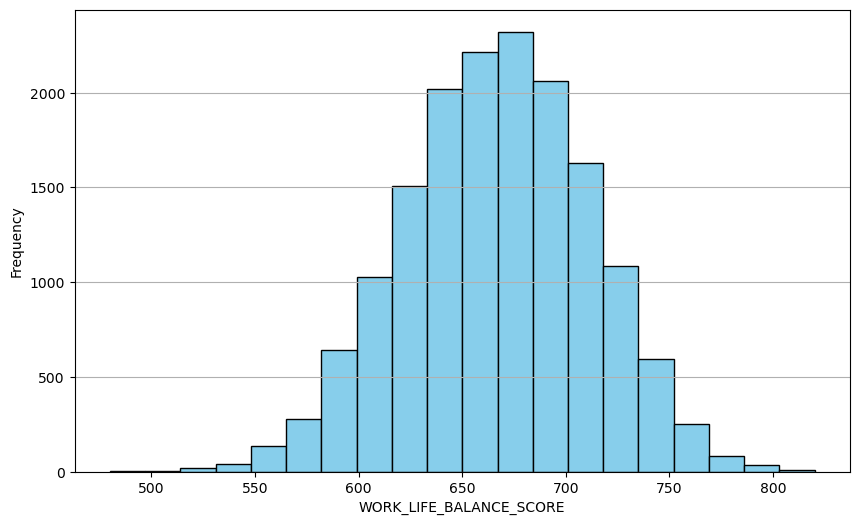

In [37]:
# Creating the histogram using only Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_clean['WORK_LIFE_BALANCE_SCORE'], bins=20, color='skyblue', edgecolor='black')
#plt.title('Histogram of WORK_LIFE_BALANCE_SCORE', fontsize=18)
plt.xlabel('WORK_LIFE_BALANCE_SCORE')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### Categorical Data Analysis

#### Gender Variable

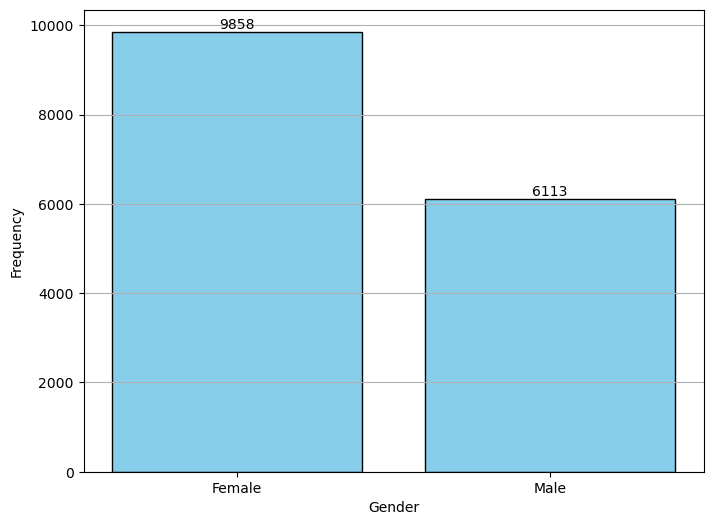

,Count,Proportion (%)
GENDER,,
Female,9858,61.72
Male,6113,38.28


In [38]:
# Frequency count and proportion for 'GENDER'
gender_counts = df_clean['GENDER'].value_counts()
gender_proportions = df_clean['GENDER'].value_counts(normalize=True) * 100

# Creating a DataFrame for the gender analysis
gender_analysis_df_clean = pd.DataFrame({
    'Count': gender_counts,
    'Proportion (%)': gender_proportions.round(2)
})

# Visualizing the 'GENDER' distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values, color='skyblue', edgecolor='black')
#plt.title('Gender Distribution', fontsize=18)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

gender_analysis_df_clean

#### Age Variable

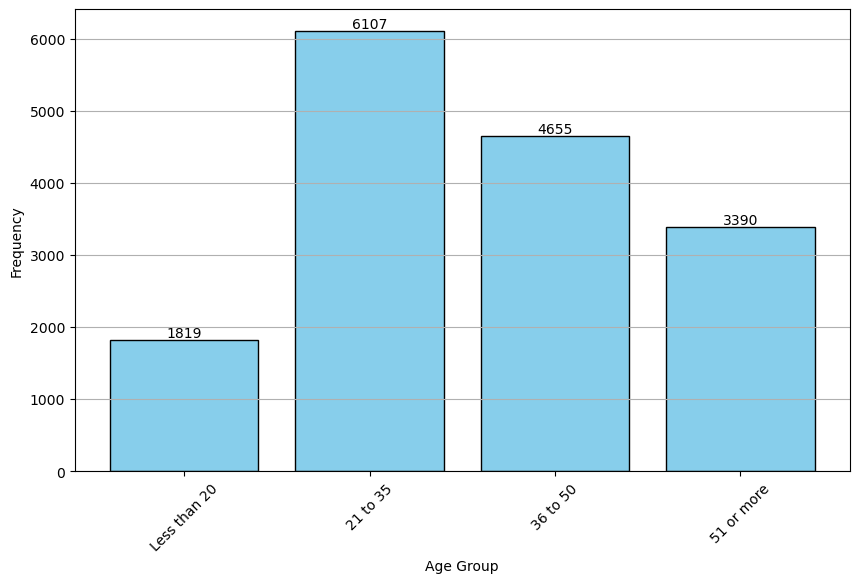

,Count,Proportion (%)
AGE,,
21 to 35,6107,38.24
36 to 50,4655,29.15
51 or more,3390,21.23
Less than 20,1819,11.39


In [39]:
# Frequency count and proportion for 'AGE'
age_counts = df_clean['AGE'].value_counts()
age_proportions = df_clean['AGE'].value_counts(normalize=True) * 100

# Creating a DataFrame for the age analysis
age_analysis_df_clean = pd.DataFrame({
    'Count': age_counts,
    'Proportion (%)': age_proportions.round(2)
})

# Specifying the order of the age categories
age_order = ["Less than 20", "21 to 35", "36 to 50", "51 or more"]

# Reordering the age_counts according to the specified order
age_counts_ordered = age_counts.reindex(age_order)

plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts_ordered.index, age_counts_ordered.values, color='skyblue', edgecolor='black')
#plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

age_analysis_df_clean

### AGE_GROUP and GENDER variables in relation to the WORK_LIFE_BALANCE_SCORE

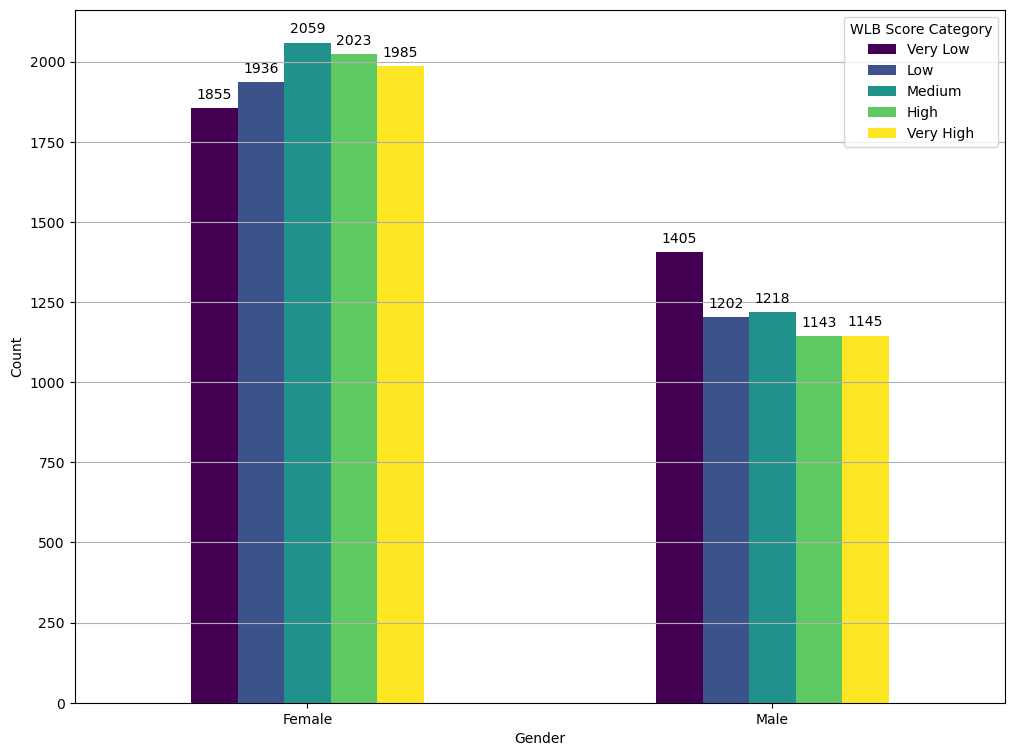

In [40]:
# Re-creating the quintile categorization for 'WORK_LIFE_BALANCE_SCORE'
df_clean['WLB_Score_Category'] = pd.qcut(df_clean['WORK_LIFE_BALANCE_SCORE'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Analyzing work-life balance score categories across GENDER
wlb_gender = df_clean.groupby('GENDER')['WLB_Score_Category'].value_counts().unstack().fillna(0)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 9))
wlb_gender_bars = wlb_gender.plot(kind='bar', ax=ax, colormap='viridis')

#plt.title('Work-Life Balance Score Distribution Across Gender', fontsize=18)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='WLB Score Category')

# Adding number labels above each bar
for p in wlb_gender_bars.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

plt.show()

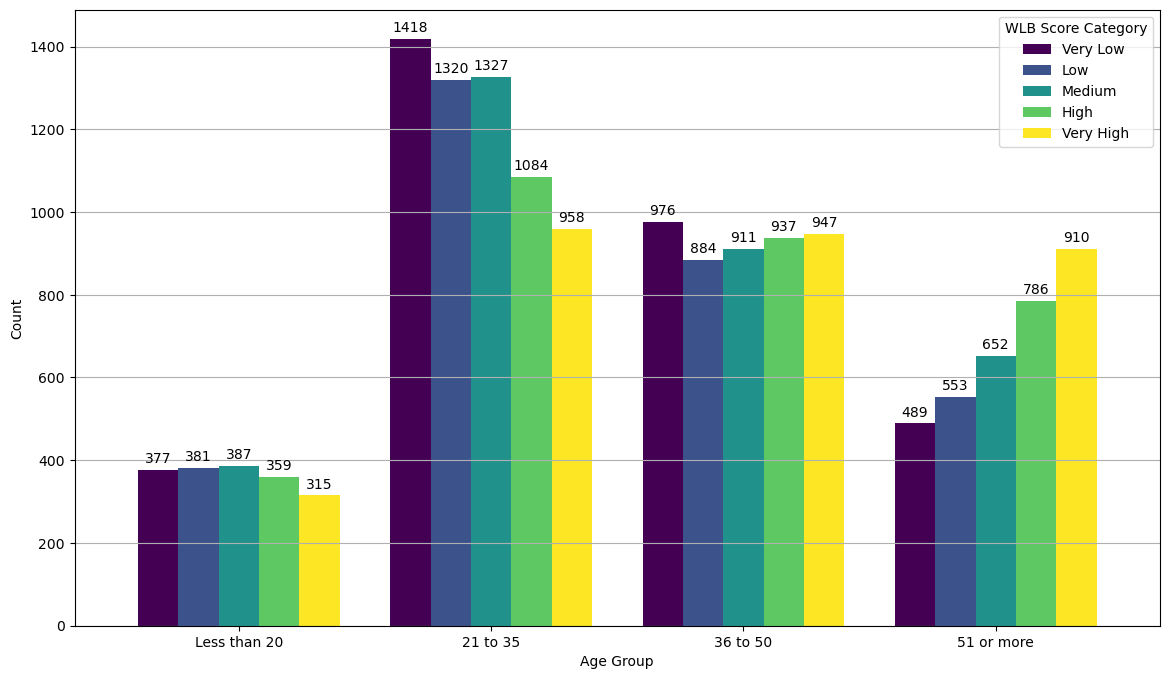

In [41]:
# Preparing data for plotting
wlb_age = df_clean.groupby('AGE')['WLB_Score_Category'].value_counts().unstack().fillna(0)

# Reordering the age groups
age_order = ["Less than 20", "21 to 35", "36 to 50", "51 or more"]
wlb_age_ordered = wlb_age.reindex(age_order)

# Plotting the bar chart with adjusted settings
fig, ax = plt.subplots(figsize=(14, 8))
bars = wlb_age_ordered.plot(kind='bar', ax=ax, width=0.8, colormap='viridis')  # Adjusted bar width
#plt.title('Work-Life Balance Score Distribution by Age Group', fontsize=18)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='WLB Score Category')

# Adding labels above each bar
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', padding=3)

plt.show()

In [42]:
df_clean.to_csv('abw508_clean_dataset_wlb_category.csv', index=False)

## Correlation Analysis Using Spearman Correlation

In [43]:
# Import Spearman Corelation library
from scipy.stats import spearmanr

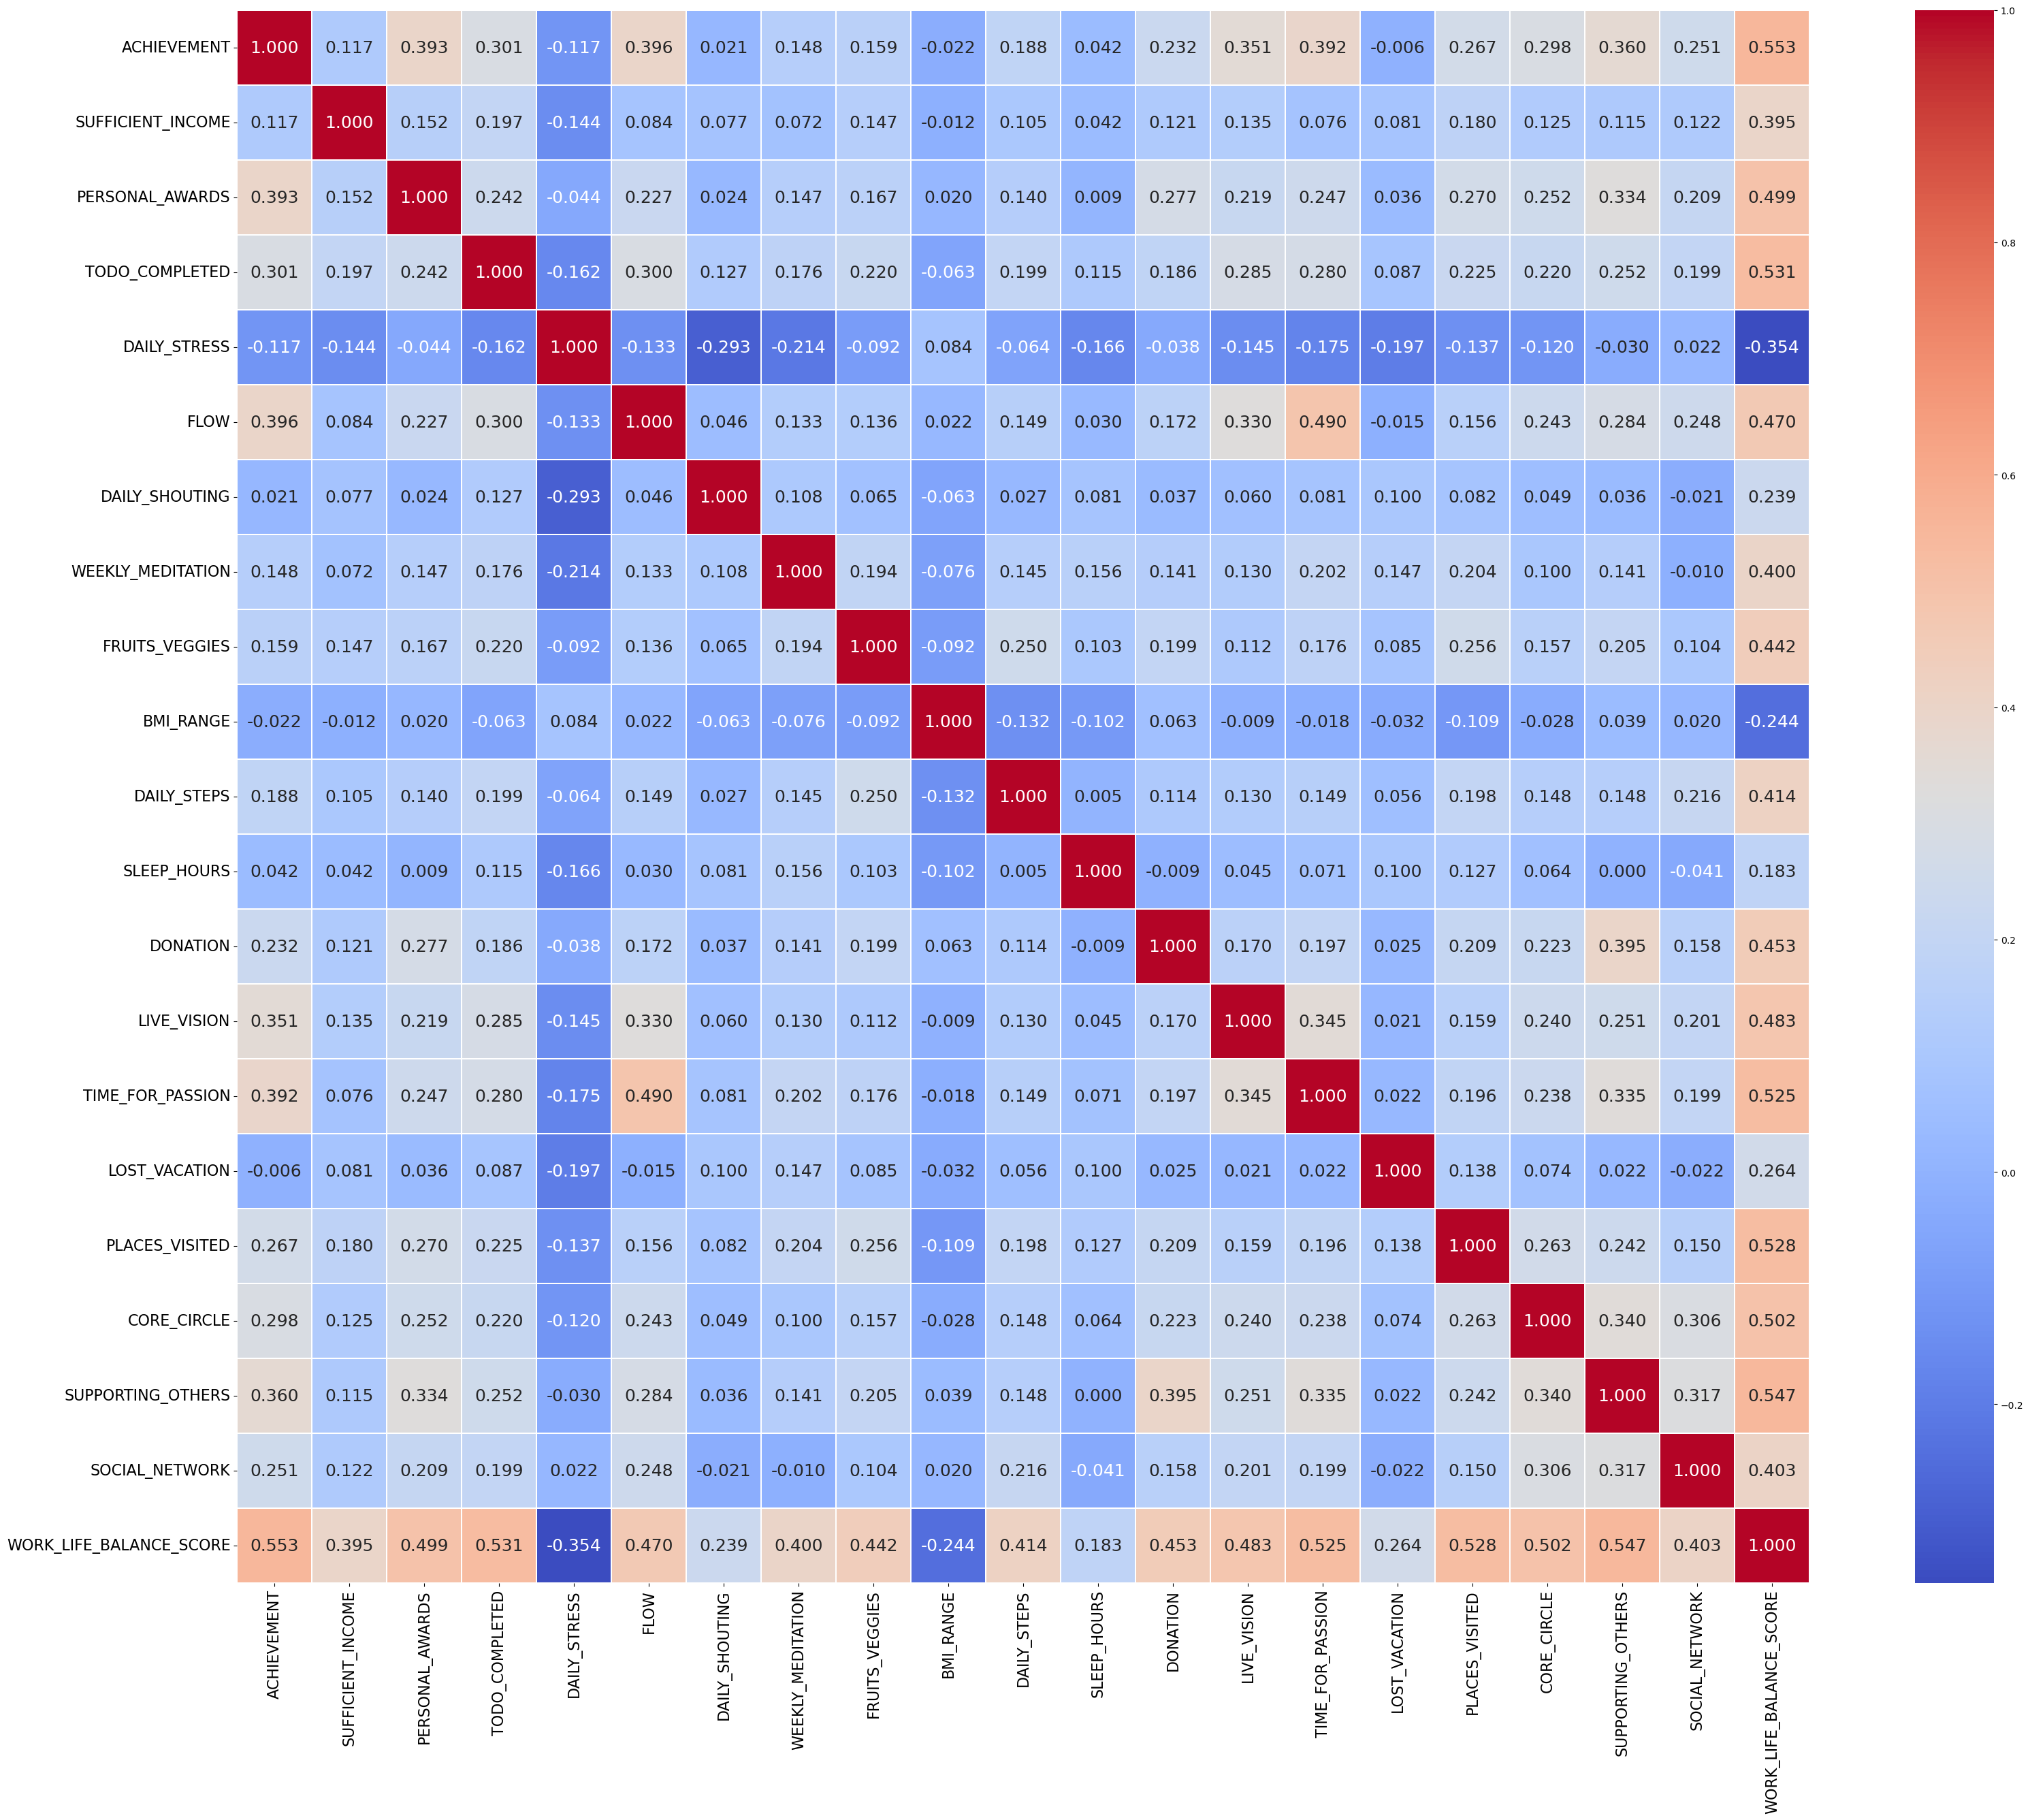

In [44]:
# Replace these columns
all_dimension = ['ACHIEVEMENT', 'SUFFICIENT_INCOME','PERSONAL_AWARDS', 'TODO_COMPLETED',
                 'DAILY_STRESS', 'FLOW','DAILY_SHOUTING','WEEKLY_MEDITATION',
                 'FRUITS_VEGGIES', 'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS',
                 'DONATION', 'LIVE_VISION', 'TIME_FOR_PASSION', 'LOST_VACATION',
                 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                  'WORK_LIFE_BALANCE_SCORE']

# Subset DataFrame with selected columns
all_data = df_clean[all_dimension]

# Calculate Spearman correlation matrix
spearman_corr_all, _ = spearmanr(all_data)

# Display the correlation matrix
plt.figure(figsize=(40, 30))
sns.heatmap(spearman_corr_all, annot=True, cmap='coolwarm', linewidths=0.2, fmt=".3f", square=True, 
            xticklabels=all_dimension, yticklabels=all_dimension, annot_kws={"size": 18})
#plt.title('Spearman Correlation Heatmap for Whole Dimension', y=1.04, fontsize=30, fontweight='bold')
plt.xticks(fontsize=16)  # Adjust the font size for x-axis labels
plt.yticks(fontsize=16)  # Adjust the font size for y-axis labels
plt.show()

## Modelling (Ordinal Least Square Regression)

In [2]:
df_clean = pd.read_csv("C:/Users/surya/OneDrive/Documents/Kuliah S2/Semester 2 (Oct 2023)/ABW508 (Analytics Lab)/Dataset/Lifestyle & Wellbeing Data/abw508_clean_dataset_remove 5 columns.csv")
df_clean.head()

,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2,5,0,5,2,6,4,5,0,7,5,5,4,0,5,36 to 50,Female,609
1,4,3,8,10,5,5,2,5,5,8,8,8,3,2,6,36 to 50,Female,655
2,3,4,4,10,3,2,2,4,5,8,0,8,4,8,3,36 to 50,Female,631
3,10,3,10,7,2,3,5,5,0,5,3,5,5,2,0,51 or more,Female,622
4,3,3,10,4,2,5,0,5,0,7,10,10,8,1,5,51 or more,Female,663


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from mord import OrdinalRidge
from statsmodels.miscmodels.ordinal_model import OrderedModel


In [4]:
# Removing the 'AGE' and 'GENDER' columns
data_modified = df_clean.drop(columns=['AGE', 'GENDER'])

data_modified.head()

,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,2,5,0,5,2,6,4,5,0,7,5,5,4,0,5,609
1,4,3,8,10,5,5,2,5,5,8,8,8,3,2,6,655
2,3,4,4,10,3,2,2,4,5,8,0,8,4,8,3,631
3,10,3,10,7,2,3,5,5,0,5,3,5,5,2,0,622
4,3,3,10,4,2,5,0,5,0,7,10,10,8,1,5,663


In [7]:
# Selecting independent variables (excluding AGE, GENDER, and the target variable)
independent_variables = data_modified.drop(columns=['WORK_LIFE_BALANCE_SCORE'])

# Selecting the dependent variable
dependent_variable = data_modified['WORK_LIFE_BALANCE_SCORE']

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.3, random_state=42)

# Adding a constant to the model (necessary for statsmodels' OLS)
X_train_sm = sm.add_constant(X_train)

# Training the OLS model using statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
model_summary = model.summary()

# Adding a constant to the test data (for statsmodels prediction)
X_test_sm = sm.add_constant(X_test)

# Predicting on the test set using the statsmodels OLS model
y_pred = model.predict(X_test_sm)

# Calculating MSE for the statsmodels predictions
mse = mean_squared_error(y_test, y_pred)

print(model_summary)
print(f"\nMean Squared Error: {mse}")

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.902
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     6837.
Date:                     Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                             22:36:03   Log-Likelihood:                -45536.
No. Observations:                    11179   AIC:                         9.110e+04
Df Residuals:                        11163   BIC:                         9.122e+04
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------